In [2]:
def aStarAlgo(start_node, stop_node):
    

    open_set = set(start_node) # {A}, len{open_set}=1
    closed_set = set()
    g = {} # store the distance from starting node
    parents = {}
    g[start_node] = 0
    parents[start_node] = start_node # parents['A']='A"

    while len(open_set) > 0 :
        n = None

        for v in open_set: # v='B'/'F'
            if n == None or g[v] + heuristic(v) < g[n] + heuristic(n):
                n = v # n='A'

        if n == stop_node or Graph_nodes[n] == None:
            pass
        else:
            for (m, weight) in get_neighbors(n):
             # nodes 'm' not in first and last set are added to first
             # n is set its parent
                if m not in open_set and m not in closed_set:
                    open_set.add(m)      # m=B weight=6 {'F','B','A'} len{open_set}=2
                    parents[m] = n       # parents={'A':A,'B':A} len{parent}=2
                    g[m] = g[n] + weight # g={'A':0,'B':6, 'F':3} len{g}=2
                else:
                    if g[m] > g[n] + weight:
                    #update g(m)
                        g[m] = g[n] + weight
                    #change parent of m to n
                        parents[m] = n

                    #if m in closed set,remove and add to open
                        if m in closed_set:
                            closed_set.remove(m)
                            open_set.add(m)

        if n == None:
            print('Path does not exist!')
            return None

        # if the current node is the stop_node
        # then we begin reconstructin the path from it to the start_node
        if n == stop_node:
            path = []

            while parents[n] != n:
                path.append(n)
                n = parents[n]

            path.append(start_node)

            path.reverse()

            print('Path found: {}'.format(path))
            return path
        open_set.remove(n)# {'F','B'} len=2
        closed_set.add(n) #{A} len=1

    print('Path does not exist!')
    return None

#define fuction to return neighbor and its distance
#from the passed node
def get_neighbors(v):
    if v in Graph_nodes:
        return Graph_nodes[v]
    else:
        return None
#for simplicity we ll consider heuristic distances given
#and this function returns heuristic distance for all nodes
 
def heuristic(n):
    H_dist = {
        'A': 10,
        'B': 8,
        'C': 5,
        'D': 7,
        'E': 3,
        'F': 6,
        'G': 5,
        'H': 3,
        'I': 1,
        'J': 0
    }

    return H_dist[n]
Graph_nodes = {
    
    'A': [('B', 6), ('F', 3)],
    'B': [('C', 3), ('D', 2)],
    'C': [('D', 1), ('E', 5)],
    'D': [('C', 1), ('E', 8)],
    'E': [('I', 5), ('J', 5)],
    'F': [('G', 1),('H', 7)] ,
    'G': [('I', 3)],
    'H': [('I', 2)],
    'I': [('E', 5), ('J', 3)],

}
aStarAlgo('A', 'J')

Path found: ['A', 'F', 'G', 'I', 'J']


['A', 'F', 'G', 'I', 'J']

In [3]:
class Graph:
    def __init__(self, graph, heuristicNodeList, startNode): #instantiate graph object with graph topology, heuristic values, start node

        self.graph = graph
        self.H=heuristicNodeList
        self.start=startNode
        self.parent={}
        self.status={}
        self.solutionGraph={}

    def applyAOStar(self): # starts a recursive AO* algorithm
        self.aoStar(self.start, False)

    def getNeighbors(self, v): # gets the Neighbors of a given node
        return self.graph.get(v,'')

    def getStatus(self,v): # return the status of a given node
        return self.status.get(v,0)

    def setStatus(self,v, val): # set the status of a given node
        self.status[v]=val

    def getHeuristicNodeValue(self, n):
        return self.H.get(n,0) # always return the heuristic value of a given node

    def setHeuristicNodeValue(self, n, value):
        self.H[n]=value # set the revised heuristic value of a given node


    def printSolution(self):
        print("FOR GRAPH SOLUTION, TRAVERSE THE GRAPH FROM THE STARTNODE:",self.start)
        print("------------------------------------------------------------")
        print(self.solutionGraph)
        print("------------------------------------------------------------")

    def computeMinimumCostChildNodes(self, v): # Computes the Minimum Cost of child nodes of a given node v
        minimumCost=0
        costToChildNodeListDict={}
        costToChildNodeListDict[minimumCost]=[]
        flag=True
        for nodeInfoTupleList in self.getNeighbors(v): # iterate over all the set of child node/s
            cost=0
            nodeList=[]
            for c, weight in nodeInfoTupleList:
                cost=cost+self.getHeuristicNodeValue(c)+weight
                nodeList.append(c)
        
            if flag==True: # initialize Minimum Cost with the cost of first set of child node/s
                minimumCost=cost
                costToChildNodeListDict[minimumCost]=nodeList # set the Minimum Cost child node/s
                flag=False
            else: # checking the Minimum Cost nodes with the current Minimum Cost
                if minimumCost>cost:
                    minimumCost=cost
                    costToChildNodeListDict[minimumCost]=nodeList # set the Minimum Cost child node/s


        return minimumCost, costToChildNodeListDict[minimumCost] # return Minimum Cost and Minimum Cost child node/s


    def aoStar(self, v, backTracking): # AO* algorithm for a start node and backTracking status flag

        print("HEURISTIC VALUES :", self.H)
        print("SOLUTION GRAPH :", self.solutionGraph)
        print("PROCESSING NODE :", v)

        print("-----------------------------------------------------------------------------------------")
    
        if self.getStatus(v) >= 0: # if status node v >= 0, compute Minimum Cost nodes of v
            minimumCost, childNodeList = self.computeMinimumCostChildNodes(v)
            self.setHeuristicNodeValue(v, minimumCost)
            self.setStatus(v,len(childNodeList))

            solved=True # check the Minimum Cost nodes of v are solved
        
            for childNode in childNodeList:
                self.parent[childNode]=v
                if self.getStatus(childNode)!=-1:
                    solved=solved & False

            if solved==True: # if the Minimum Cost nodes of v are solved, set the current node status as solved(-1)
                self.setStatus(v,-1)
                self.solutionGraph[v]=childNodeList # update the solution graph with the solved nodes which may be a part of solution


            if v!=self.start: # check the current node is the start node for backtracking the current node value
                self.aoStar(self.parent[v], True) # backtracking the current node value with backtracking status set to true

            if backTracking==False: # check the current call is not for backtracking
                for childNode in childNodeList: # for each Minimum Cost child node
                    self.setStatus(childNode,0) # set the status of child node to 0(needs exploration)
                    self.aoStar(childNode, False) # Minimum Cost child node is further explored with backtracking status as false



h1 = {'A': 1, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J':1, 'T': 3}
graph1 = {
    'A': [[('B', 1), ('C', 1)], [('D', 1)]],
    'B': [[('G', 1)], [('H', 1)]],
    'C': [[('J', 1)]],
    'D': [[('E', 1), ('F', 1)]],
    'G': [[('I', 1)]]
}
G1= Graph(graph1, h1, 'A')
G1.applyAOStar()
G1.printSolution()

h2 = {'A': 1, 'B': 6, 'C': 12, 'D': 10, 'E': 4, 'F': 4, 'G': 5, 'H': 7} # Heuristic values of Nodes
graph2 = { # Graph of Nodes and Edges
    'A': [[('B', 1), ('C', 1)], [('D', 1)]], # Neighbors of Node 'A', B, C & D with repective weights
    'B': [[('G', 1)], [('H', 1)]], # Neighbors are included in a list of lists
    'D': [[('E', 1), ('F', 1)]] # Each sublist indicate a "OR" node or "AND" nodes
}

G2 = Graph(graph2, h2, 'A') # Instantiate Graph object with graph, heuristic values and start Node
G2.applyAOStar() # Run the AO* algorithm
G2.printSolution() # print the solution graph as AO* Algorithm search

HEURISTIC VALUES : {'A': 1, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH : {}
PROCESSING NODE : A
-----------------------------------------------------------------------------------------
HEURISTIC VALUES : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH : {}
PROCESSING NODE : B
-----------------------------------------------------------------------------------------
HEURISTIC VALUES : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH : {}
PROCESSING NODE : A
-----------------------------------------------------------------------------------------
HEURISTIC VALUES : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH : {}
PROCESSING NODE : G
-----------------------------------------------------------------------------------------
HEURISTIC VALUES : {'A': 10, 'B': 6, 'C':

In [5]:
import csv

with open("trainingexamples.csv") as f:
    csv_file = csv.reader(f)
    data = list(csv_file)

    specific = data[1][:-1]
    general = [['?' for i in range(len(specific))] for j in range(len(specific))]

    for i in data:
        if i[-1] == "Yes":
            for j in range(len(specific)):
                if i[j] != specific[j]:
                    specific[j] = "?"
                    general[j][j] = "?"

        elif i[-1] == "No":
            for j in range(len(specific)):
                if i[j] != specific[j]:
                    general[j][j] = specific[j]
                else:
                    general[j][j] = "?"

        print("\nStep " + str(data.index(i)+1) + " of Candidate Elimination Algorithm")
        print(specific)
        print(general)

    gh = [] # gh = general Hypothesis
    for i in general:
        for j in i:
            if j != '?':
                gh.append(i)
                break
    print("\nFinal Specific hypothesis:\n", specific)
    print("\nFinal General hypothesis:\n", gh)


Step 1 of Candidate Elimination Algorithm
['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 2 of Candidate Elimination Algorithm
['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 3 of Candidate Elimination Algorithm
['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 4 of Candidate Elimination Algorithm
['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
[['Sunny', '?', '?', '?', '?', '?'], ['?', 

In [6]:
import pandas as pd
import math

# function to calculate the entropy of entire dataset
# -----------------------------------------------------------------------
def base_entropy(dataset):
    p = 0
    n = 0
    target = dataset.iloc[:, -1]
    targets = list(set(target))
    for i in target:
        if i == targets[0]:
            p = p + 1
        else:
            n = n + 1
    if p == 0 or n == 0:
        return 0
    elif p == n:
        return 1
    else:
        entropy = 0 - (
            ((p / (p + n)) * (math.log2(p / (p + n))) + (n / (p + n)) * (math.log2(n/ (p + n)))))
        return entropy

# -----------------------------------------------------------------------

# function to calculate the entropy of attributes
# -----------------------------------------------------------------------
def entropy(dataset, feature, attribute):
    p = 0
    n = 0
    target = dataset.iloc[:, -1]
    targets = list(set(target))
    for i, j in zip(feature, target):
        if i == attribute and j == targets[0]:
            p = p + 1
        elif i == attribute and j == targets[1]:
            n = n + 1
        if p == 0 or n == 0:
            return 0
        elif p == n:
            return 1
        else:
            entropy = 0 - (
                ((p / (p + n)) * (math.log2(p / (p + n))) + (n / (p + n)) * (math.log2(n/ (p + n)))))
            return entropy


# -----------------------------------------------------------------------


# a utility function for checking purity and impurity of a child
# -----------------------------------------------------------------------
def counter(target, attribute, i):
    p = 0
    n = 0
    targets = list(set(target))
    for j, k in zip(target, attribute):
        if j == targets[0] and k == i:
            p = p + 1
        elif j == targets[1] and k == i:
            n = n + 1
    return p, n

# -----------------------------------------------------------------------
# function that calculates the information gain
# -----------------------------------------------------------------------
def Information_Gain(dataset, feature):
    Distinct = list(set(feature))
    Info_Gain = 0
    for i in Distinct:
        Info_Gain = Info_Gain + feature.count(i) / len(feature) * entropy(dataset,feature, i)
        Info_Gain = base_entropy(dataset) - Info_Gain
    return Info_Gain


# -----------------------------------------------------------------------


# function that generates the childs of selected Attribute
# -----------------------------------------------------------------------
def generate_childs(dataset, attribute_index):
    distinct = list(dataset.iloc[:, attribute_index])
    childs = dict()
    for i in distinct:
        childs[i] = counter(dataset.iloc[:, -1], dataset.iloc[:, attribute_index], i)
    return childs

# -----------------------------------------------------------------------

# function that modifies the dataset according to the impure childs
# -----------------------------------------------------------------------
def modify_data_set(dataset,index, feature, impurity):
    size = len(dataset)
    subdata = dataset[dataset[feature] == impurity]
    del (subdata[subdata.columns[index]])
    return subdata


# -----------------------------------------------------------------------


# function that return attribute with the greatest Information Gain
# -----------------------------------------------------------------------
def greatest_information_gain(dataset):
    max = -1
    attribute_index = 0
    size = len(dataset.columns) - 1
    for i in range(0, size):
        feature = list(dataset.iloc[:, i])
        i_g = Information_Gain(dataset, feature)
        if max < i_g:
            max = i_g
            attribute_index = i
    return attribute_index


# -----------------------------------------------------------------------


# function to construct the decision tree
# -----------------------------------------------------------------------
def construct_tree(dataset, tree):
    target = dataset.iloc[:, -1]
    impure_childs = []
    attribute_index = greatest_information_gain(dataset)
    childs = generate_childs(dataset, attribute_index)
    tree[dataset.columns[attribute_index]] = childs
    targets = list(set(dataset.iloc[:, -1]))
    for k, v in childs.items():
        if v[0] == 0:
            tree[k] = targets[1]
        elif v[1] == 0:
            tree[k] = targets[0]
        elif v[0] != 0 or v[1] != 0:
            impure_childs.append(k)
    for i in impure_childs:
        sub = modify_data_set(dataset,attribute_index,
        dataset.columns[attribute_index], i)
        tree = construct_tree(sub, tree)
    return tree


# ---------------------------------------------------------------------------
# main function
# -----------------------------------------------------------------------
def main():
    df = pd.read_csv("playtennis.csv")
    tree = dict()
    result = construct_tree(df, tree)
    for key, value in result.items():
        print(key, " => ", value)


# -----------------------------------------------------------------------

if __name__ == "__main__":
    main()

Outlook  =>  {'Sunny': (3, 2), 'Overcast': (0, 4), 'Rain': (2, 3)}
Overcast  =>  Yes
Temperature  =>  {'Mild': (1, 2), 'Cool': (1, 1)}
Hot  =>  No
Cool  =>  Yes
Humidity  =>  {'Normal': (1, 1)}
High  =>  No
Normal  =>  Yes
Wind  =>  {'Weak': (0, 1), 'Strong': (1, 0)}
Weak  =>  Yes
Strong  =>  No


In [3]:
import numpy as np
X = np.array(([2, 9], [1, 5], [3, 6]))
y = np.array(([92], [86], [89]), dtype=float)
 # maximum of X array longitudinally
y = y/100

#Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

#Variable initialization
epoch=10000                #Setting training iterations
lr=0.1                    #Setting learning rate
inputlayer_neurons = 2    #number of features in data set
hiddenlayer_neurons = 3   #number of hidden layers neurons
output_neurons = 1        #number of neurons at output layer

#weight and bias initialization
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))


#draws a random range of numbers uniformly of dim x*y
for i in range(epoch):
    
#Forward Propogation
    hinp1=np.dot(X,wh)
    hinp=hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1=np.dot(hlayer_act,wout)
    outinp= outinp1+ bout
    output = sigmoid(outinp)
    
#Backpropagation
    EO = y-output
    outgrad = derivatives_sigmoid(output)
    d_output = EO* outgrad
    EH = d_output.dot(wout.T)

#how much hidden layer wts contributed to error
    hiddengrad = derivatives_sigmoid(hlayer_act)
    d_hiddenlayer = EH * hiddengrad
    
# dotproduct of nextlayererror and currentlayerop
    wout += hlayer_act.T.dot(d_output) *lr
    wh += X.T.dot(d_hiddenlayer) *lr
    
    
print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

Input: 
[[2 9]
 [1 5]
 [3 6]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.89380249]
 [0.88075152]
 [0.89468058]]


In [2]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

# Load Data from CSV
data = pd.read_csv('tennis.csv')
print("The first 5 Values of data is :\n", data.head())

# obtain train data and train output
X = data.iloc[:, :-1]
print("\nThe First 5 values of the train data is\n", X.head())

y = data.iloc[:, -1]
print("\nThe First 5 values of train output is\n", y.head())

# convert them in numbers
le_outlook = LabelEncoder()
X.Outlook = le_outlook.fit_transform(X.Outlook)

le_Temperature = LabelEncoder()
X.Temperature = le_Temperature.fit_transform(X.Temperature)

le_Humidity = LabelEncoder()
X.Humidity = le_Humidity.fit_transform(X.Humidity)

le_Windy = LabelEncoder()
X.Windy = le_Windy.fit_transform(X.Windy)

print("\nNow the Train output is\n", X.head())

le_PlayTennis = LabelEncoder()
y = le_PlayTennis.fit_transform(y)
print("\nNow the Train output is\n",y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

classifier = GaussianNB()
classifier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
print("Accuracy is:", accuracy_score(classifier.predict(X_test), y_test))

The first 5 Values of data is :
     Outlook Temperature Humidity   Windy PlayTennis
0     Sunny         Hot     High    Weak         No
1     Sunny         Hot     High  Strong         No
2  Overcast         Hot     High    Weak        Yes
3      Rain        Mild     High    Weak        Yes
4      Rain        Cool   Normal    Weak        Yes

The First 5 values of the train data is
     Outlook Temperature Humidity   Windy
0     Sunny         Hot     High    Weak
1     Sunny         Hot     High  Strong
2  Overcast         Hot     High    Weak
3      Rain        Mild     High    Weak
4      Rain        Cool   Normal    Weak

The First 5 values of train output is
 0     No
1     No
2    Yes
3    Yes
4    Yes
Name: PlayTennis, dtype: object

Now the Train output is
    Outlook  Temperature  Humidity  Windy
0        2            1         0      1
1        2            1         0      0
2        0            1         0      1
3        1            2         0      1
4        1         

C:\Users\prana\AppData\Local\Temp\ipykernel_2776\1431836600.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Outlook = le_outlook.fit_transform(X.Outlook)
C:\Users\prana\AppData\Local\Temp\ipykernel_2776\1431836600.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Temperature = le_Temperature.fit_transform(X.Temperature)
C:\Users\prana\AppData\Local\Temp\ipykernel_2776\1431836600.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

C:\Users\Swetha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Swetha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Swetha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.


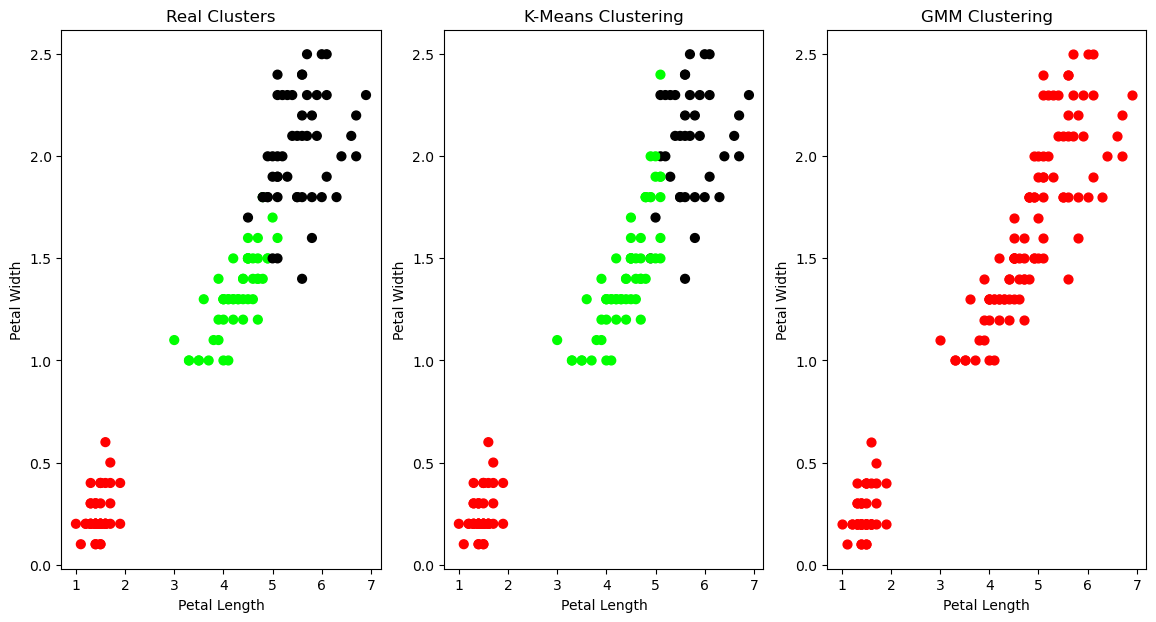

In [10]:
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.cluster import KMeans 
import pandas as pd
import numpy as np

# import some data to play with 
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width'] 
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

# Build the K Means Model
model = KMeans(n_clusters=3)
model.fit(X) # model.labels_ : Gives cluster no for which samples belongs to

# # Visualise the clustering results
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])

# Plot the Original Classifications using Petal features
plt.subplot(1, 3, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40) 
plt.title('Real Clusters')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')

# Plot the Models Classifications
plt.subplot(1, 3, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40) 
plt.title('K-Means Clustering')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')

# General EM for GMM
from sklearn import preprocessing

# transform your data such that its distribution will have a # mean value 0 and standard deviation of 1.
scaler = preprocessing.StandardScaler() 
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
from sklearn.mixture import GaussianMixture 
gmm = GaussianMixture(n_components=40) 
gmm.fit(xs)
plt.subplot(1, 3, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[0], s=40) 
plt.title('GMM Clustering')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')

print('Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.')

In [8]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import datasets
iris=datasets.load_iris() 
print("Iris Data set loaded...")
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.1)
#random_state=0
for i in range(len(iris.target_names)):
    print("Label", i , "-",str(iris.target_names[i]))
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
print("Results of Classification using K-nn with K=1 ") 
for r in range(0,len(x_test)):
    print(" Sample:", str(x_test[r]), " Actual-label:", str(y_test[r])," Predicted-label:", str(y_pred[r]))

    print("Classification Accuracy :" , classifier.score(x_test,y_test));

Iris Data set loaded...
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
Results of Classification using K-nn with K=1 
 Sample: [6.7 3.3 5.7 2.1]  Actual-label: 2  Predicted-label: 2
Classification Accuracy : 0.9333333333333333
 Sample: [7.  3.2 4.7 1.4]  Actual-label: 1  Predicted-label: 1
Classification Accuracy : 0.9333333333333333
 Sample: [6.3 2.3 4.4 1.3]  Actual-label: 1  Predicted-label: 1
Classification Accuracy : 0.9333333333333333
 Sample: [5.7 3.  4.2 1.2]  Actual-label: 1  Predicted-label: 1
Classification Accuracy : 0.9333333333333333
 Sample: [7.2 3.2 6.  1.8]  Actual-label: 2  Predicted-label: 2
Classification Accuracy : 0.9333333333333333
 Sample: [4.5 2.3 1.3 0.3]  Actual-label: 0  Predicted-label: 0
Classification Accuracy : 0.9333333333333333
 Sample: [5.6 2.9 3.6 1.3]  Actual-label: 1  Predicted-label: 1
Classification Accuracy : 0.9333333333333333
 Sample: [5.7 3.8 1.7 0.3]  Actual-label: 0  Predicted-label: 0
Classification Accuracy : 0.9333333333333333

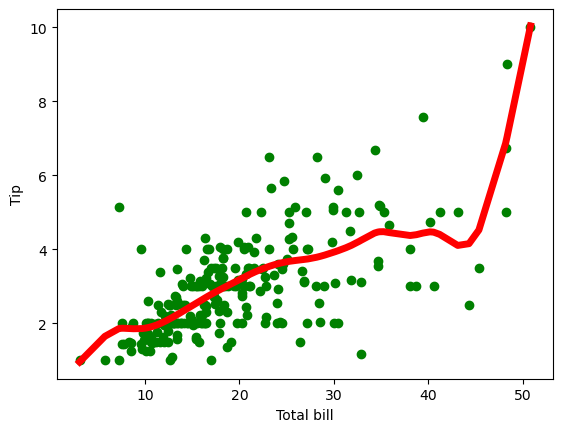

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
def kernel(point,xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m))) # eye - identity matrix
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights
def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W
def localWeightRegression(xmat,ymat,k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred
def graphPlot(X,ypred):
    sortindex = X[:,1].argsort(0) #argsort - index of the smallest
    xsort = X[sortindex][:,0]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(bill,tip, color='green')
    ax.plot(xsort[:,1],ypred[sortindex], color = 'red', linewidth=5)
    plt.xlabel('Total bill')
    plt.ylabel('Tip')
    plt.show();
# load data points
data = pd.read_csv('tips.csv')
bill = np.array(data.total_bill) # We use only Bill amount and Tips data
tip = np.array(data.tip)
mbill = np.mat(bill) # .mat will convert nd array is converted in 2D array
mtip = np.mat(tip)
m= np.shape(mbill)[1]
one = np.mat(np.ones(m))
X = np.hstack((one.T,mbill.T)) # 244 rows, 2 cols
ypred = localWeightRegression(X,mtip,2) # increase k to get smooth curves
graphPlot(X,ypred)